#### 29.04.25, &copy; Vladyslav Matkovsʹkyy KI-21-1

# Лабораторна робота №8. Побудова дерев ухвалення рішень

__Мета__: закріпити на практиці концепцію алгоритмів побудови дерев ухвалення рішень засобами мови Python

## Що ви будете вміти?
* Реалізовувати алгоритми ID3 побудови дерева ухвалення рішень при розв’язанні задачі класифікації по засобами мови Python
* Візуалізувати і аналізувати результати
* Підбирати оптимальні параметри моделі

## Завдання для самостійної роботи 

1. Розглянути наведені вище приклади.

2. Реалізувати алгоритм побудови класифікаційного дерева ухвалення рішень, наведений в роботі, для свого варіанта, обгрунтувавши знаення відповідних параметрів.

Унікальні мітки класів: [-1  1]
Ініціалізація та навчання моделі...
Навчання завершено.
Побудова графіку меж рішень...


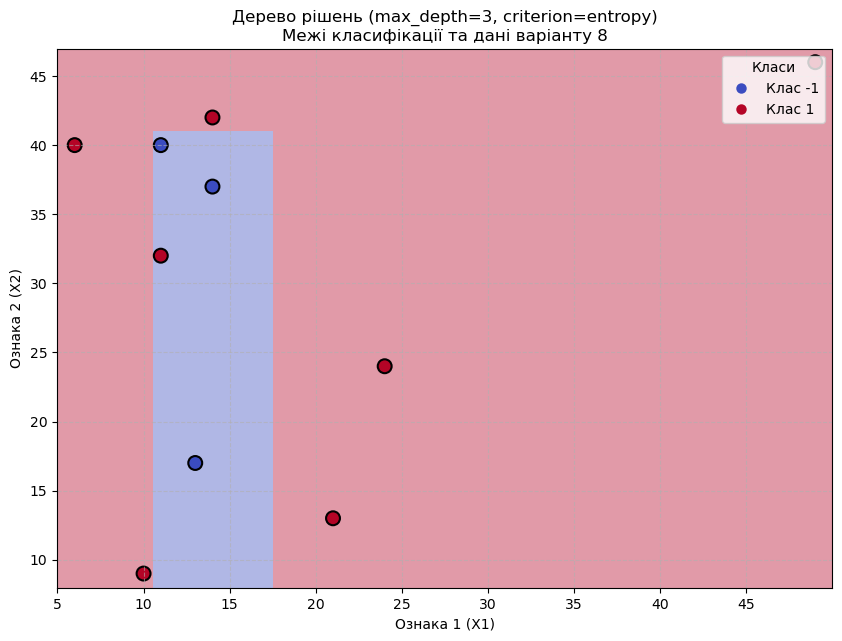

Графік меж рішень показано.
Побудова графіку структури дерева...


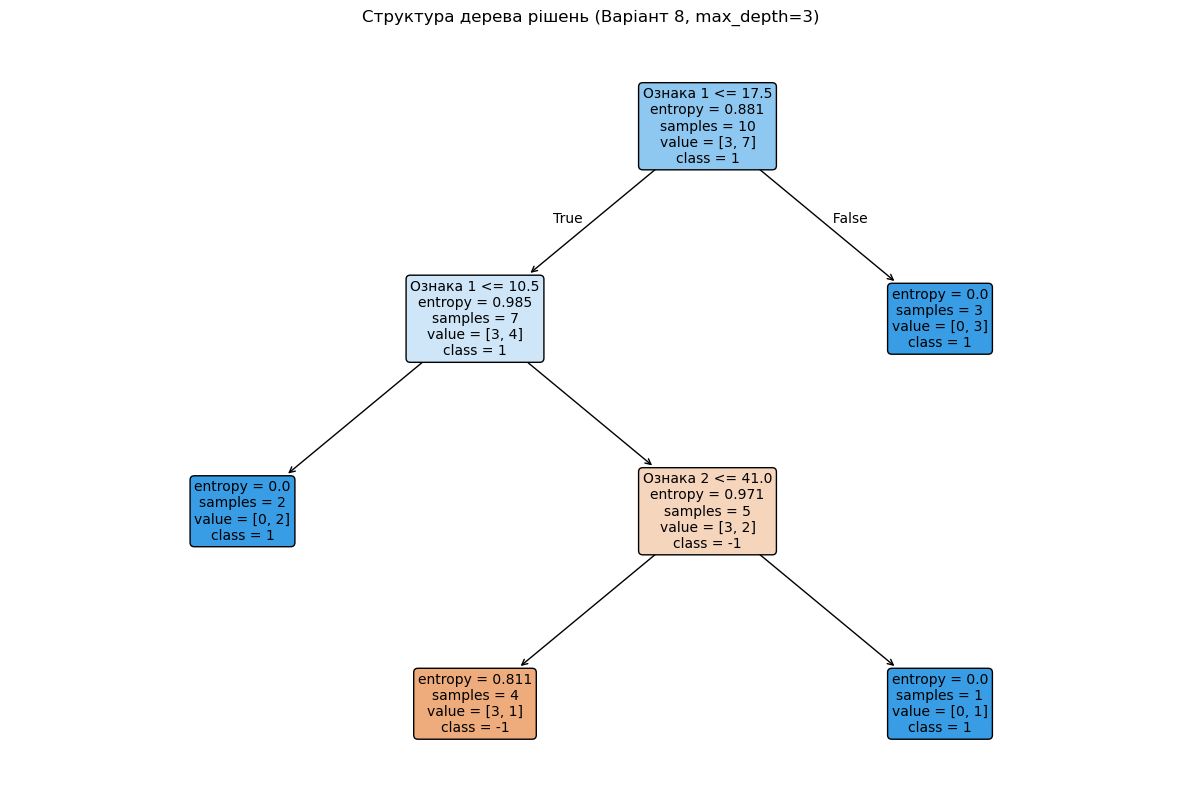

Графік структури дерева показано.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Дані варіанта 8
x_train_8 = np.array([
    [13, 17],
    [14, 37],
    [6, 40],
    [11, 40],
    [10, 9],
    [11, 32],
    [49, 46],
    [24, 24],
    [14, 42],
    [21, 13]
])
y_train_8 = np.array([-1, -1, 1, -1, 1, 1, 1, 1, 1, 1])

train_data = x_train_8
train_labels = y_train_8

print(f"Унікальні мітки класів: {np.unique(train_labels)}")

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

print("Ініціалізація та навчання моделі...")
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=5)
clf_tree.fit(train_data, train_labels)
print("Навчання завершено.")

print("Побудова графіку меж рішень...")
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm', shading='auto', alpha=0.4)

scatter = plt.scatter(
    train_data[:, 0], train_data[:, 1],
    c=train_labels,
    s=100,
    cmap='coolwarm',
    edgecolors='black',
    linewidth=1.5
)

plt.xlabel('Ознака 1 (X1)')
plt.ylabel('Ознака 2 (X2)')
plt.title(f'Дерево рішень (max_depth={clf_tree.max_depth}, criterion={clf_tree.criterion})\nМежі класифікації та дані варіанту 8')

handles, labels = scatter.legend_elements()
class_labels = [f'Клас {int(l)}' for l in np.unique(train_labels)]
if len(handles) == len(class_labels):
     plt.legend(handles, class_labels, title="Класи", loc='upper right')
else:
     plt.legend(title=f"Класи: {np.unique(train_labels)}")

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print("Графік меж рішень показано.")

print("Побудова графіку структури дерева...")
plt.figure(figsize=(15, 10))
feature_names = ['Ознака 1', 'Ознака 2']
class_names = [str(c) for c in sorted(np.unique(train_labels))]

plot_tree(clf_tree,
          filled=True,
          feature_names=feature_names,
          class_names=class_names,
          rounded=True,
          fontsize=10)

plt.title(f'Структура дерева рішень (Варіант 8, max_depth={clf_tree.max_depth})')
plt.show()
print("Графік структури дерева показано.")


**Пояснення результатів:**

**Графік меж рішень:** Цей графік показує, як навчене дерево рішень розділяє простір ознак (площину X1-X2) на регіони, що відповідають кожному класу (-1 або 1). Кольоровий фон представляє прогнозований клас для кожної точки простору. Ви також бачите ваші вихідні 10 точок даних, розфарбовані відповідно до їх справжніх класів. Ви можете візуально оцінити, наскільки добре дерево розділяє ці точки.

**Графік структури дерева:** Цей графік показує саму логіку дерева.

*   Кожен внутрішній вузол (не лист) містить умову розділення (наприклад, `Ознака 1 <= 39.0`).
*   Вузол також показує значення `entropy` (або `gini`, якщо обрано), кількість прикладів (`samples`), що потрапили в цей вузол, та розподіл цих прикладів за класами (`value = [кількість класу -1, кількість класу 1]`).
*   Колір вузла вказує на переважаючий клас у ньому.
*   Листові вузли (кінцеві) не мають подальших розділень і містять остаточний прогноз класу для прикладу, що потрапив у цей лист.
*   Глибина дерева обмежена параметром `max_depth=3`.

3. Дати відповіді на контрольні запитання.

4. Відправити результати роботи у файлі lab_8_StudentLastName.ipynb до віддаленого репозиторію на GіtHub

## Контрольні питання

*1. Які особливості дискретного випадку в логічних методах класифікації?*

*   **Пряме використання:** Дискретні ознаки (категоріальні, бінарні) часто використовуються безпосередньо в логічних правилах (напр., `ЯКЩО Колір = 'Синій' ТОДІ ...`), на відміну від неперервних, що потребують визначення порогів (`> <`).
*   **Методи розбиття (Splitting):**
    *   **Багатошляхове (Multi-way):** Можливе створення гілки для *кожного* значення дискретної ознаки (характерно для ID3). Може швидко фрагментувати дані.
    *   **Бінарне (групування):** Частіше використовується розбиття на *дві підмножини* значень (напр., `{A, B}` проти `{C, D}`). Це стандарт для CART і створює бінарні дерева, що вимагає пошуку оптимального групування.
*   **Відсутність потреби в дискретизації:** Немає необхідності перетворювати ознаки в дискретні інтервали, оскільки вони вже такими є.
*   **Інтерпретованість:** Правила, що базуються на дискретних ознаках, зазвичай є дуже зрозумілими для людини.
*   **Проблема високої кардинальності:** Ознаки з дуже великою кількістю унікальних значень (напр., ID міста) можуть ускладнювати побудову моделі (багато гілок або складний пошук оптимального бінарного розбиття) і можуть потребувати спеціальної обробки (напр., групування значень).

*2. Які властивості характерні для неперервного випадку в логічних методах класифікації?*

*   **Необхідність визначення порогів:** Основна операція — знаходження оптимальних порогових значень (split points) для розділення діапазону неперервної ознаки (напр., `ЯКЩО Вік <= 35.5 ТОДІ ...`).
*   **Бінарні розбиття:** Зазвичай, розбиття для неперервної ознаки є бінарним (`Ознака <= Поріг` та `Ознака > Поріг`). Це стандарт для алгоритмів типу CART.
*   **Пошук оптимального порогу:** Алгоритм перебирає можливі точки розбиття (часто між відсортованими унікальними значеннями ознаки) і вибирає ту, що максимізує критерій якості (зменшення Gini/ентропії).
*   **Багаторазове використання:** Одна й та сама неперервна ознака може використовуватися для розбиття на різних рівнях дерева з різними пороговими значеннями.
*   **Чутливість до масштабування (меншою мірою):** На відміну від методів, що базуються на відстанях, дерева рішень менш чутливі до масштабу ознак, оскільки розглядають кожну ознаку незалежно при пошуку порогу. Однак, дуже різні діапазони можуть опосередковано впливати на вибір ознаки для розбиття.
*   **Обчислювальна складність:** Пошук оптимального порогу для неперервної ознаки може бути більш обчислювально затратним, ніж робота з дискретними ознаками, особливо при великій кількості унікальних значень.

*3. Які критерії якості використовуються для побудови дерев ухвалення рішень?*

**Для задач класифікації:**

*   **Індекс Джині (Gini Impurity):**
    *   Вимірює ймовірність неправильної класифікації випадково обраного елемента, якщо його клас визначати випадково відповідно до розподілу класів у вузлі.
    *   Формула: `1 - Σ(p_i)^2`, де `p_i` — частка об'єктів класу `i` у вузлі.
    *   Прагне до 0 для "чистих" вузлів (всі об'єкти одного класу).
    *   Часто використовується в алгоритмі CART.

*   **Ентропія (Entropy) та Приріст Інформації (Information Gain):**
    *   **Ентропія:** Вимірює рівень невизначеності або хаосу у вузлі.
    *   Формула: `- Σ(p_i * log2(p_i))`. Прагне до 0 для "чистих" вузлів.
    *   **Приріст Інформації:** Вимірює зменшення ентропії після розділення вузла. Алгоритм (напр., ID3, C4.5) вибирає розділення, що максимізує цей приріст.
    *   `Information Gain = Entropy(батько) - Σ(вага_дитини * Entropy(дитина))`

*   **Помилка класифікації (Classification Error):**
    *   Найпростіший критерій: частка неправильно класифікованих об'єктів, якщо всім об'єктам вузла присвоїти найпоширеніший клас.
    *   Формула: `1 - max(p_i)`.
    *   Менш чутливий до змін у розподілі класів порівняно з Gini та Entropy, тому рідше використовується для побудови дерева, але може застосовуватись для обрізки (pruning).

**Для задач регресії:**

*   **Середньоквадратична помилка (Mean Squared Error, MSE):**
    *   Вимірює середнє значення квадратів різниць між фактичними значеннями цільової змінної та їх середнім значенням у вузлі.
    *   Алгоритм (напр., CART для регресії) прагне мінімізувати MSE у дочірніх вузлах.

*   **Середня абсолютна помилка (Mean Absolute Error, MAE):**
    *   Вимірює середнє абсолютних різниць між фактичними значеннями та їх медіаною (або середнім) у вузлі.
    *   Менш чутлива до викидів, ніж MSE.

*4. Як працює алгоритм ID3 у контексті побудови дерев класифікації?*

ID3 — це один з ранніх та фундаментальних алгоритмів для побудови дерев рішень. Він працює за **жадібним рекурсивним підходом "згори-вниз"**.

**Основні кроки роботи:**

1.  **Початок:** Алгоритм починається з кореневого вузла, який містить весь тренувальний набір даних.
2.  **Вибір найкращої ознаки:** На кожному кроці (у кожному вузлі) алгоритм обчислює **Приріст Інформації (Information Gain)** для *кожної ще не використаної ознаки*.
    *   Приріст Інформації базується на **Ентропії** (мірі невизначеності/чистоти вузла).
    *   Обирається та ознака, яка дає **максимальний** Приріст Інформації при розділенні даних у поточному вузлі.
3.  **Створення вузла та гілок:**
    *   Обрана ознака стає поточним вузлом дерева.
    *   Для **кожного можливого значення** цієї дискретної ознаки створюється окрема гілка, що веде від цього вузла.
4.  **Розділення даних:** Набір даних поточного вузла розділяється на підмножини відповідно до значень обраної ознаки, і кожна підмножина передається вздовж відповідної гілки до нового вузла.
5.  **Рекурсія:** Алгоритм рекурсивно викликається для кожної підмножини даних (на кожній гілці).
6.  **Умови зупинки рекурсії:**
    *   Всі приклади у поточному вузлі належать до одного класу (вузол стає листовим з цією міткою класу).
    *   Більше немає ознак для розділення, але класи змішані (вузол стає листовим з міткою найчастішого класу - мажоритарне голосування).
    *   У вузлі немає прикладів (рідкісний випадок, може стати листом з мажоритарним класом батьківського вузла).

**Ключові особливості та обмеження ID3:**

*   **Критерій:** Використовує Ентропію та Приріст Інформації.
*   **Тип ознак:** Призначений переважно для **дискретних (категоріальних)** ознак. Не працює безпосередньо з неперервними (потребують попередньої дискретизації).
*   **Розбиття:** Створює **багатошляхові (multi-way)** розбиття для дискретних ознак (одна гілка на кожне значення).
*   **Схильність до перенавчання:** Не має вбудованих механізмів обрізки (pruning) і може створювати дуже глибокі дерева, що перенавчаються на даних.
*   **Упередженість:** Приріст Інформації віддає перевагу ознакам з великою кількістю унікальних значень.
*   **Відсутні значення:** Не має стандартного способу обробки відсутніх значень.